# Aufgabe Problemtypen

In [2]:
using LinearAlgebra
using PyPlot
using PrettyTables

In [3]:
G1 = [1.0 1.0 0 0]

1×4 Array{Float64,2}:
 1.0  1.0  0.0  0.0

In [4]:
l = sqrt(1+0.25^2)
G2 = [G1;l l 0 0]

2×4 Array{Float64,2}:
 1.0      1.0      0.0  0.0
 1.03078  1.03078  0.0  0.0

In [5]:
l = sqrt(1^2+0.5^2)
G3 = [G2;l 0 0 l]

3×4 Array{Float64,2}:
 1.0      1.0      0.0  0.0
 1.03078  1.03078  0.0  0.0
 1.11803  0.0      0.0  1.11803

In [6]:
G4 = [G3;l l/2 0 l/2]

4×4 Array{Float64,2}:
 1.0      1.0       0.0  0.0
 1.03078  1.03078   0.0  0.0
 1.11803  0.0       0.0  1.11803
 1.11803  0.559017  0.0  0.559017

In [7]:
G5 = [G3;0 l l 0]

4×4 Array{Float64,2}:
 1.0      1.0      0.0      0.0
 1.03078  1.03078  0.0      0.0
 1.11803  0.0      0.0      1.11803
 0.0      1.11803  1.11803  0.0

In [8]:
G6 = [G5;l l/2 0 l/2]

5×4 Array{Float64,2}:
 1.0      1.0       0.0      0.0
 1.03078  1.03078   0.0      0.0
 1.11803  0.0       0.0      1.11803
 0.0      1.11803   1.11803  0.0
 1.11803  0.559017  0.0      0.559017

In [15]:
s=svd(G6)
display(s.S)

4-element Array{Float64,1}:
 2.718523274002041
 1.6450999918722284
 0.9504089779938011
 1.0072109040568042e-16

In [9]:
G7 = [G6;0 0 1 1]

6×4 Array{Float64,2}:
 1.0      1.0       0.0      0.0
 1.03078  1.03078   0.0      0.0
 1.11803  0.0       0.0      1.11803
 0.0      1.11803   1.11803  0.0
 1.11803  0.559017  0.0      0.559017
 0.0      0.0       1.0      1.0

In [10]:
l = sqrt(1+0.25^2)
G8a = [G7;0 0 l l]
G8 = [G2;l l 0 0;0 0 1 1;0 0 l l]

5×4 Array{Float64,2}:
 1.0      1.0      0.0      0.0
 1.03078  1.03078  0.0      0.0
 1.03078  1.03078  0.0      0.0
 0.0      0.0      1.0      1.0
 0.0      0.0      1.03078  1.03078

In [11]:
l = sqrt(1 + 0.75^2)
G9 = [G8;l/3 l 0 0]

6×4 Array{Float64,2}:
 1.0       1.0      0.0      0.0
 1.03078   1.03078  0.0      0.0
 1.03078   1.03078  0.0      0.0
 0.0       0.0      1.0      1.0
 0.0       0.0      1.03078  1.03078
 0.416667  1.25     0.0      0.0

In [12]:
l = sqrt(1+1)
G10 = [G9;l 0 0 l]

7×4 Array{Float64,2}:
 1.0       1.0      0.0      0.0
 1.03078   1.03078  0.0      0.0
 1.03078   1.03078  0.0      0.0
 0.0       0.0      1.0      1.0
 0.0       0.0      1.03078  1.03078
 0.416667  1.25     0.0      0.0
 1.41421   0.0      0.0      1.41421

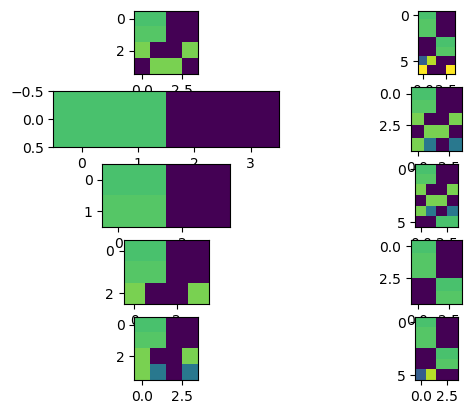

In [13]:
allG = [G1, G2, G3, G4, G5, G6, G7, G8, G9, G10]
fig, ax = subplots(5, 2)
for (i, G) in enumerate(allG)
    aa = ax[(i % 5)+1, div(i-1, 5)+1]
    im = aa.imshow(G)
    im.set_clim(0, 1.4)
end

In [14]:
using LinearAlgebra
# rang = 1:10
# for G = allG
#     rang[i] = rank(G)
[rank(G) for G = allG]

10-element Array{Int64,1}:
 1
 1
 2
 2
 3
 3
 3
 2
 3
 4

In [45]:
G = G10
display(G)
s= svd(G)
display(s.S)
display(pinv(G))
# display(rank(G))

7×4 Array{Float64,2}:
 1.0       1.0      0.0      0.0
 1.03078   1.03078  0.0      0.0
 1.03078   1.03078  0.0      0.0
 0.0       0.0      1.0      1.0
 0.0       0.0      1.03078  1.03078
 0.416667  1.25     0.0      0.0
 1.41421   0.0      0.0      1.41421

4-element Array{Float64,1}:
 3.0265340908693585
 2.2885229270182044
 1.2637339301549702
 0.34182140688348206

4×7 Array{Float64,2}:
  0.48   0.494773   0.494773  -2.46346e-16  -7.98667e-17  -1.2   9.00622e-17
 -0.16  -0.164924  -0.164924   3.03727e-16   1.73035e-16   1.2  -6.65008e-17
  0.48   0.494773   0.494773   0.484848      0.49977      -1.2  -0.707107
 -0.48  -0.494773  -0.494773   7.91968e-17  -7.64856e-17   1.2   0.707107

In [46]:
# define two functions for least-squares and min.-norm inverse
LSinverse(G) = inv(transpose(G)*G) * transpose(G)
MNinverse(G) = transpose(G) * inv(G*transpose(G))

MNinverse (generic function with 1 method)

In [47]:
G = G1
s = svd(G)
display(s.S)
r = count(i->(i>1e-10), s.S)
print(size(G, 1), " x ", size(G, 2), " >> ", r)

1-element Array{Float64,1}:
 1.4142135623730951

1 x 4 >> 1

In [62]:
G = G10
mSyn = [10;20;30;40]
d = G*mSyn
GT = transpose(G)
#mMN = GT * inv(G * GT) * d
# display(mMN)
mLS = inv(GT * G) * (GT * d)
display(mLS)

4-element Array{Float64,1}:
 10.0
 20.0
 30.0
 40.0

In [125]:
G = G4
GGT = G*transpose(G)
eigen(GGT)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
4-element Array{Float64,1}:
 -4.440892104669037e-16
 -2.220446049250313e-16
  1.5625000000000007
  6.937499999999987
vectors:
4×4 Array{Float64,2}:
 -0.228946   0.717741    -0.431331  -0.496373
 -0.235992  -0.696311    -0.444606  -0.511649
 -0.422349   6.2728e-16   0.771589  -0.475681
  0.844697   0.0          0.144673  -0.515322

In [65]:
G = G10
d = G * mSyn
s = svd(G)
display(s.S)
r = count(i->(i>1e-5), s.S/s.S[1])
Ginv = s.V[:, 1:r] * diagm(1.0./s.S[1:r]) * transpose(s.U[:, 1:r])
display(Ginv * d)
display(pinv(G)*d)

4-element Array{Float64,1}:
 3.0265340908693585
 2.2885229270182044
 1.2637339301549702
 0.34182140688348206

4-element Array{Float64,1}:
  9.99999999999997
 20.000000000000036
 29.999999999999964
 39.999999999999986

4-element Array{Float64,1}:
  9.999999999999972
 20.000000000000036
 29.999999999999964
 39.99999999999999

In [40]:
using PrettyTables
header = ["Aufgabe", "N", "Rang"]
table = [0 0 0]
for (i, G) in enumerate(allG)
    s = svd(G)
    r = count(i->(i>1e-5), s.S/s.S[1])
    table = [table;i size(G, 1) r] 
end
pretty_table(table[2:end, :], header)

┌─────────┬───┬──────┐
│ Aufgabe │ N │ Rang │
├─────────┼───┼──────┤
│       1 │ 1 │    1 │
│       2 │ 2 │    1 │
│       3 │ 3 │    2 │
│       4 │ 4 │    2 │
│       5 │ 4 │    3 │
│       6 │ 5 │    3 │
│       7 │ 6 │    3 │
│       8 │ 5 │    2 │
│       9 │ 6 │    3 │
│      10 │ 7 │    4 │
└─────────┴───┴──────┘


In [77]:
G = G10
d = G * mSyn
display(pinv(G)*d)
display(LSinverse(G)*d)
display(MNinverse(G)*d)

4-element Array{Float64,1}:
  9.999999999999972
 20.000000000000036
 29.999999999999964
 39.99999999999999

4-element Array{Float64,1}:
  9.999999999999948
 20.000000000000036
 29.999999999999986
 40.00000000000002

SingularException: SingularException(3)

In [17]:
G = G9
display(G)
d = G * mSyn
display(LSinverse(G)*d)
display(MNinverse(G)*d)

8×4 Array{Float64,2}:
 1.0       1.0      0.0      0.0
 1.03078   1.03078  0.0      0.0
 1.11803   0.0      0.0      1.11803
 0.0       1.11803  1.11803  0.0
 0.0       1.11803  1.11803  0.0
 0.0       0.0      1.0      1.0
 0.0       0.0      1.03078  1.03078
 0.416667  1.25     0.0      0.0

UndefVarError: UndefVarError: mSyn not defined

In [81]:
mSyn = [10;20;30;40]
error = 1
for (i, G) in enumerate(allG)
    d = G * mSyn + randn(size(G, 1)) .* error
    m = pinv(G) * d
    println(i, round.(m.*100)/100)
end
print(d)

1[14.85, 14.85, 0.0, 0.0]
2[14.64, 14.64, 0.0, 0.0]
3[27.02, 3.34, 0.0, 23.68]
4[26.48, 2.76, 0.0, 23.72]
5[15.17, 14.33, 34.51, 35.35]
6[14.64, 14.72, 35.44, 35.37]
7[14.41, 15.44, 35.39, 34.36]
8[15.1, 15.1, 35.01, 35.01]
9[8.99, 21.32, 35.88, 35.88]
10[8.41, 21.38, 29.4, 41.19]
[29.031828751450234, 29.5367441292544, 32.60958476188118, 70.62630928247515, 72.73239048039036, 30.230586280176762, 70.1382782520574]

In [90]:
G = G10
RM = pinv(G) * G
RD = G * pinv(G)
display(RM)
display(RD)

4×4 Array{Float64,2}:
 1.0          -4.44089e-16  -3.28671e-16  -2.01303e-16
 2.61225e-16   1.0           4.82087e-16   3.88041e-16
 8.53284e-17  -5.55112e-17   1.0          -4.69783e-16
 1.09778e-16   7.21645e-16   3.57309e-19   1.0

7×7 Array{Float64,2}:
 0.32          0.329848     0.329848     …  -4.44089e-16   2.35614e-17
 0.329848      0.34         0.34            -3.63472e-16   2.42865e-17
 0.329848      0.34         0.34            -3.63472e-16   2.42865e-17
 1.66533e-16   1.66533e-16  1.66533e-16      0.0          -3.33067e-16
 1.98172e-16   1.46664e-16  1.30447e-16      1.01119e-16  -3.21118e-16
 6.03684e-16  -3.747e-16    2.22045e-16  …   1.0          -4.56001e-17
 3.75991e-17  -2.5087e-16   1.11446e-16      2.54371e-16   1.0